In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [5]:
# from sklearn.preprocessing import MinMaxScaler

# rm_scaler = MinMaxScaler()
# lstat_scaler = MinMaxScaler()
# ptratio_scaler = MinMaxScaler()
# medv_scaler = MinMaxScaler()

# data['RM'] = rm_scaler.fit_transform(data['RM'].values.reshape(-1,1))
# data['LSTAT'] = lstat_scaler.fit_transform(data['LSTAT'].values.reshape(-1,1))
# data['PTRATIO'] = ptratio_scaler.fit_transform(data['PTRATIO'].values.reshape(-1,1))
# data['MEDV'] = medv_scaler.fit_transform(data['MEDV'].values.reshape(-1,1))

# data

In [7]:
data.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

In [8]:
print(data.isnull().any())

RM         False
LSTAT      False
PTRATIO    False
MEDV       False
dtype: bool


In [11]:
data['MEDV'] = data.MEDV.astype(int)
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000


In [13]:
print(data.describe())

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


In [14]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(10, 'MEDV').index
columns

Index(['MEDV', 'RM', 'PTRATIO', 'LSTAT'], dtype='object')

#### It seems that all of the parameters are highly correlated to the result.

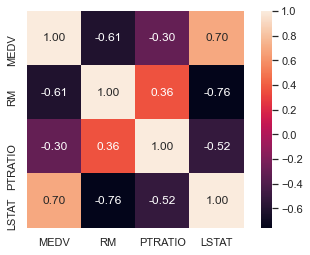

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_map = np.corrcoef(data.values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [16]:
X = data[columns]
Y = X['MEDV'].values
X = X.drop('MEDV', axis = 1).values


array([[ 6.575, 15.3  ,  4.98 ],
       [ 6.421, 17.8  ,  9.14 ],
       [ 7.185, 17.8  ,  4.03 ],
       ...,
       [ 6.976, 21.   ,  5.64 ],
       [ 6.794, 21.   ,  6.48 ],
       [ 6.03 , 21.   ,  7.88 ]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -8216131610.486760 (2306893903.622001)
ScaledLASSO: -8216131927.632428 (2306925072.548879)
ScaledEN: -9013898526.348637 (2268354457.651706)
ScaledKNN: -5345887802.769231 (1837611273.094333)
ScaledCART: -8835715148.076923 (2863701703.915533)
ScaledGBM: -4846413797.198206 (1480430397.680458)


In [30]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=0)
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-4785084400.399115 (1425939324.831967) with: {'n_estimators': 50}
-4836396875.925247 (1452748789.635257) with: {'n_estimators': 100}
-5057578251.498340 (1437662976.640478) with: {'n_estimators': 200}
-5285709647.065508 (1366335458.060046) with: {'n_estimators': 300}
-5465424711.428591 (1323373554.260270) with: {'n_estimators': 400}
Best: -4785084400.399115 using {'n_estimators': 50}


In [31]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=50)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions))

3307743321.494302


In [34]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare['Prediction'] = compare.Prediction.astype(int)
compare

,Prediction,Test Data
0,319357,401100
1,484124,501900
2,327541,319200
3,236730,147000
4,248600,247800
...,...,...
93,450227,405300
94,350095,289800
95,504392,518700
96,453992,422100
